https://www.kaggle.com/passnyc/data-science-for-good#2016%20School%20Explorer.csv

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [13]:
df = pd.read_csv('2016 School Explorer.csv')
df

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
5,NaN,NaN,NaN,P.S. 064 ROBERT SIMON,310100010064,01M064,1,40.723747,-73.981602,"600 E 6TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
6,NaN,NaN,NaN,P.S. 110 FLORENCE NIGHTINGALE,310100010110,01M110,1,40.715293,-73.979927,"285 DELANCEY ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
7,NaN,NaN,NaN,P.S. 134 HENRIETTA SZOLD,310100010134,01M134,1,40.714301,-73.982966,"293 E BROADWAY NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
8,NaN,NaN,NaN,P.S. 140 NATHAN STRAUS,310100010140,01M140,1,40.719128,-73.983283,"123 RIDGE ST NEW YORK, NY 10002",...,61,2,0,0,1,0,0,0,0,1
9,NaN,NaN,NaN,P.S. 142 AMALIA CASTRO,310100010142,01M142,1,40.718230,-73.984082,"100 ATTORNEY ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0


In [14]:
sns.set(style="darkgrid")

In [15]:
# Clean "School income estimate" by removing all dollar symbols

df['School Income Estimate'] = df['School Income Estimate'].str.replace('$', '')

# Clean "School income estimate" by removing all commas

df['School Income Estimate'] = df['School Income Estimate'].str.replace(',', '')

# Remove all rows in "School Income Estimate" and "Economic Need Index" with NaN

df = df[pd.notnull(df['School Income Estimate'])]
df = df[pd.notnull(df['Economic Need Index'])]

# Change all "School Income Estimate" types to Float

df['School Income Estimate'] = pd.to_numeric(df['School Income Estimate'])

# Change all Percents to Decimals and Floats

def p2f(x):
    return float(x.strip('%'))/100
df['Percent ELL'] = df['Percent ELL'].apply(p2f)
df['Percent Asian'] = df['Percent Asian'].apply(p2f)
df['Percent Black'] = df['Percent Black'].apply(p2f)
df['Percent Hispanic'] = df['Percent Hispanic'].apply(p2f)
df['Percent Black / Hispanic'] = df['Percent Black / Hispanic'].apply(p2f)
df['Percent White'] = df['Percent White'].apply(p2f)
df['Student Attendance Rate'] = df['Student Attendance Rate'].apply(p2f)
df['Percent of Students Chronically Absent'] = df['Percent of Students Chronically Absent'].apply(p2f)
df['Rigorous Instruction %'] = df['Rigorous Instruction %'].apply(p2f)
df['Collaborative Teachers %'] = df['Collaborative Teachers %'].apply(p2f)
df['Supportive Environment %'] = df['Supportive Environment %'].apply(p2f)
df['Effective School Leadership %'] = df['Effective School Leadership %'].apply(p2f)
df['Strong Family-Community Ties %'] = df['Strong Family-Community Ties %'].apply(p2f)
df['Trust %'] = df['Trust %'].apply(p2f)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


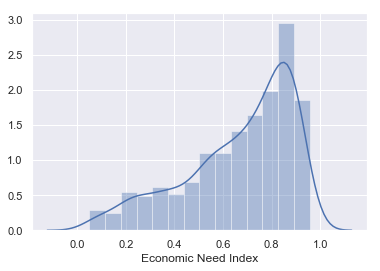

In [16]:
sns.distplot(df['Economic Need Index'])

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


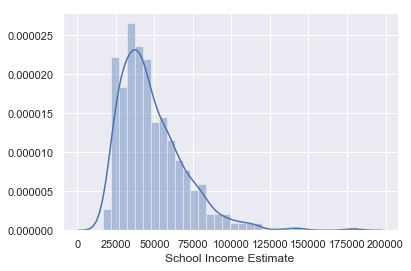

In [17]:
sns.distplot(df['School Income Estimate'])

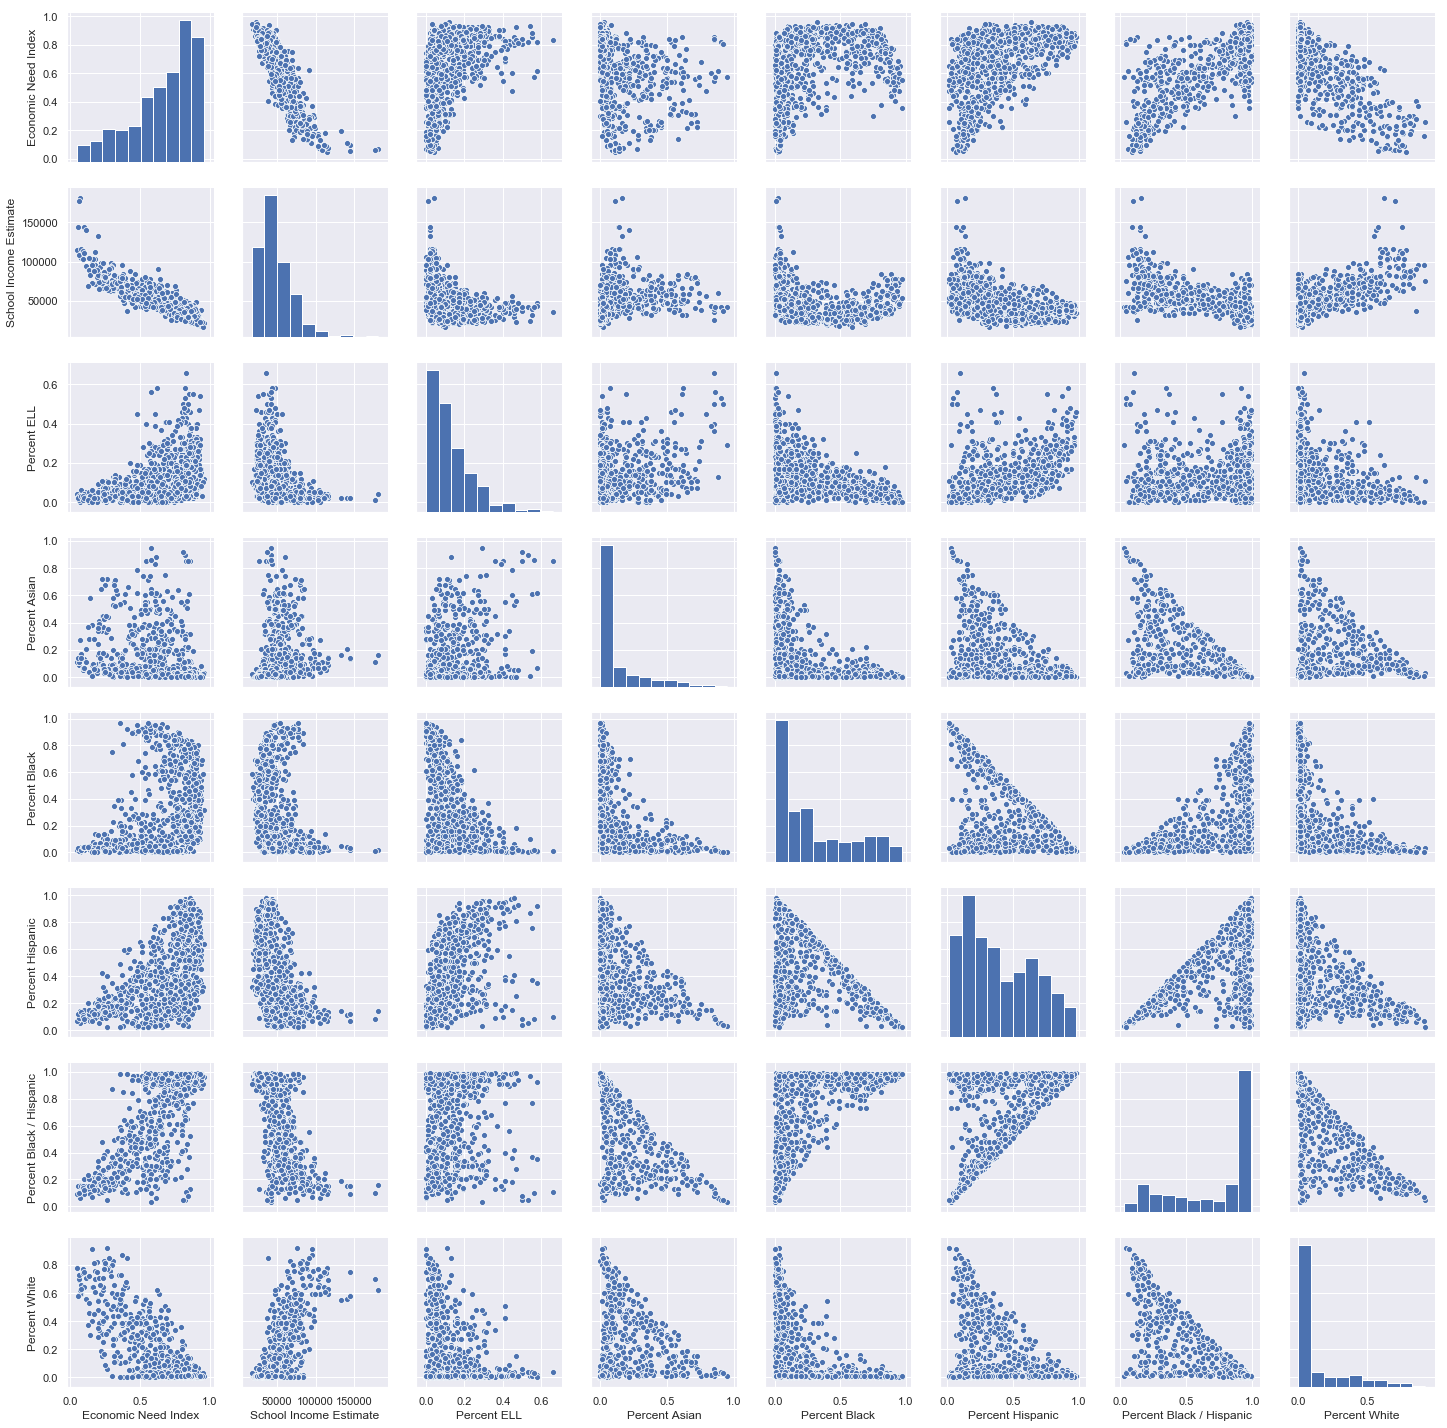

In [18]:
# Pair plot on Economic need Index against all continuous variables

g = sns.pairplot(df, vars=['Economic Need Index', 'School Income Estimate', 'Percent ELL', 'Percent Asian','Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White'])

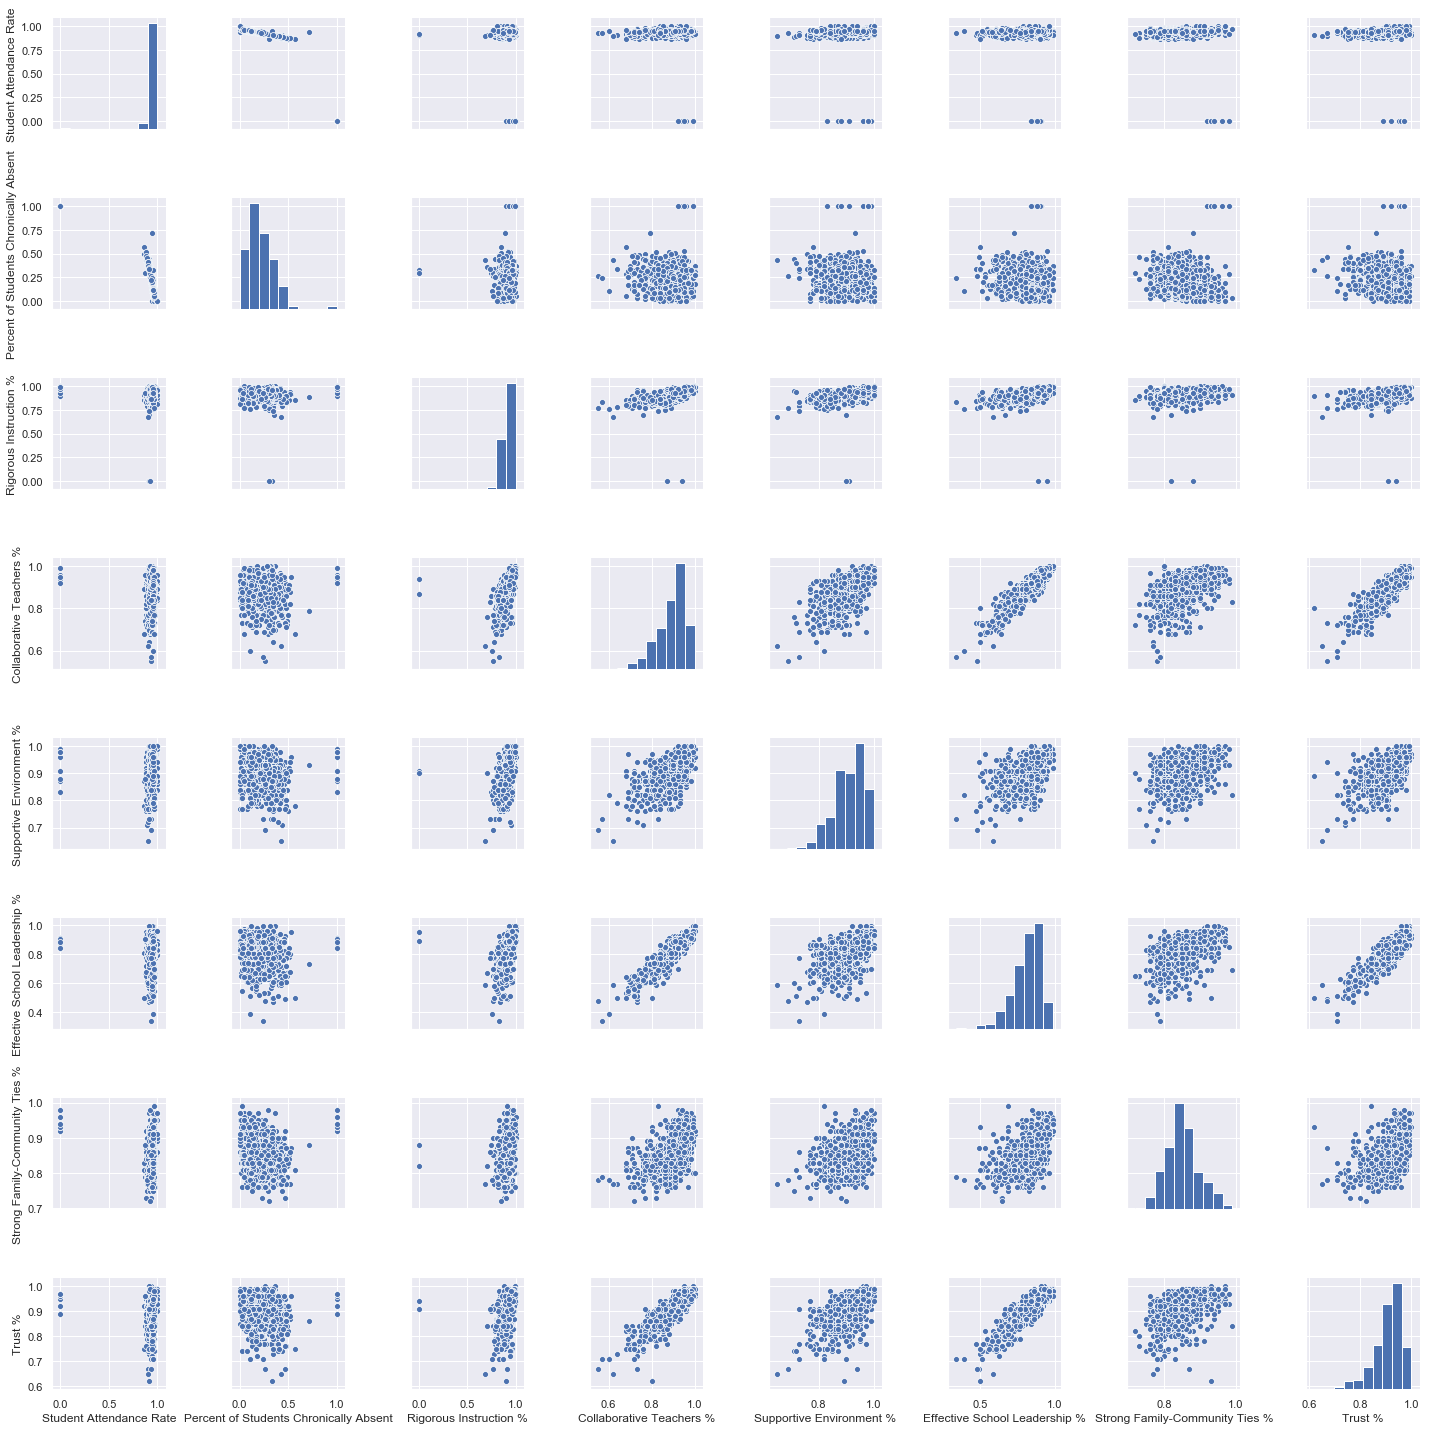

In [20]:
g = sns.pairplot(df, vars=['Student Attendance Rate', 'Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %'])

In [21]:
df_continuous = df[['Student Attendance Rate', 'Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %']]

In [23]:
df_continuous.corr()

,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
Student Attendance Rate,1.000000,-0.728136,-0.049098,-0.034730,0.033779,-0.007805,-0.144448,-0.010921
Percent of Students Chronically Absent,-0.728136,1.000000,-0.084237,-0.143096,-0.241773,-0.173295,-0.071525,-0.161112
Rigorous Instruction %,-0.049098,-0.084237,1.000000,0.509702,0.456582,0.406999,0.215889,0.389462
Collaborative Teachers %,-0.034730,-0.143096,0.509702,1.000000,0.614054,0.908594,0.435331,0.875990
Supportive Environment %,0.033779,-0.241773,0.456582,0.614054,1.000000,0.525448,0.335299,0.594352
Effective School Leadership %,-0.007805,-0.173295,0.406999,0.908594,0.525448,1.000000,0.461360,0.879588
Strong Family-Community Ties %,-0.144448,-0.071525,0.215889,0.435331,0.335299,0.461360,1.000000,0.439977
Trust %,-0.010921,-0.161112,0.389462,0.875990,0.594352,0.879588,0.439977,1.000000


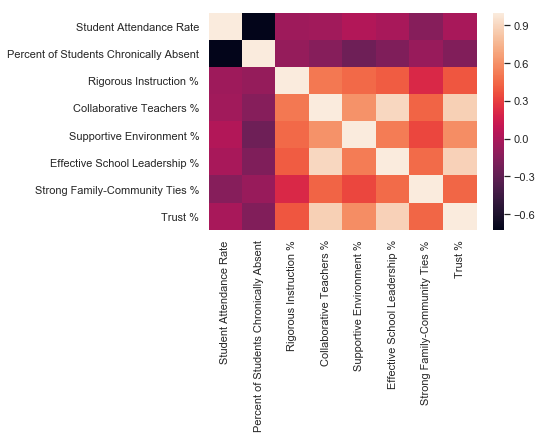

In [24]:
sns.heatmap(df_continuous.corr())